In [4]:
import os
import sys
from pathlib import Path

# Get the notebook's directory
notebook_dir = os.getcwd()

# Add the notebook directory and its parent to Python path
sys.path.append(notebook_dir)
sys.path.append(str(Path(notebook_dir).parent))

# Function to add all subdirectories to Python path
def add_subdirs_to_path():
    for root, dirs, files in os.walk(notebook_dir):
        for dir_name in dirs:
            full_path = os.path.join(root, dir_name)
            if full_path not in sys.path:
                sys.path.append(full_path)

# Add all subdirectories
add_subdirs_to_path()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_cleaning.data_consistency_check import check_data_consistency
from feature_engineering import engineer_features
from utils.load_data import load_data
from data_cleaning.data_cleaning import clean_data

In [6]:
train_df_raw = pd.read_csv("../data/train.csv")
test_df_raw = pd.read_csv("../data/test.csv")
train_df = load_data("../data/train.csv")
train_df = engineer_features(train_df)
test_df = load_data("../data/test.csv")
test_df = engineer_features(test_df)

In [7]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [8]:
# Checking data consistency after initial cleaning
train_df_check = check_data_consistency(train_df)
test_df_check = check_data_consistency(test_df)

In [9]:
# checking masonry veneer data consistency
print(sum(~train_df_check["mas_vnr_consistent"]))
# 7

7


In [10]:
print(sum(~test_df_check["mas_vnr_consistent"]))
# 4

4


In [11]:
train_df[~train_df["mas_vnr_consistent"]].transpose()

,624,688,773,1230,1241,1300,1334
Id,625,689,774,1231,1242,1301,1335
MSSubClass,60,20,20,90,20,60,160
MSZoning,RL,RL,RL,RL,RL,RL,RM
LotFrontage,80.0,60.0,70.0,NaN,83.0,NaN,24.0
LotArea,10400,8089,10150,18890,9849,10762,2368
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NA,NA,NA,NA,NA,NA,NA
LotShape,Reg,Reg,Reg,IR1,Reg,IR1,Reg
LandContour,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [12]:
train_df[train_df["MasVnrArea"] > 0]["MasVnrType"].value_counts()

MasVnrType
BrkFace    444
Stone      127
BrkCmn      15
None         5
Name: count, dtype: int64

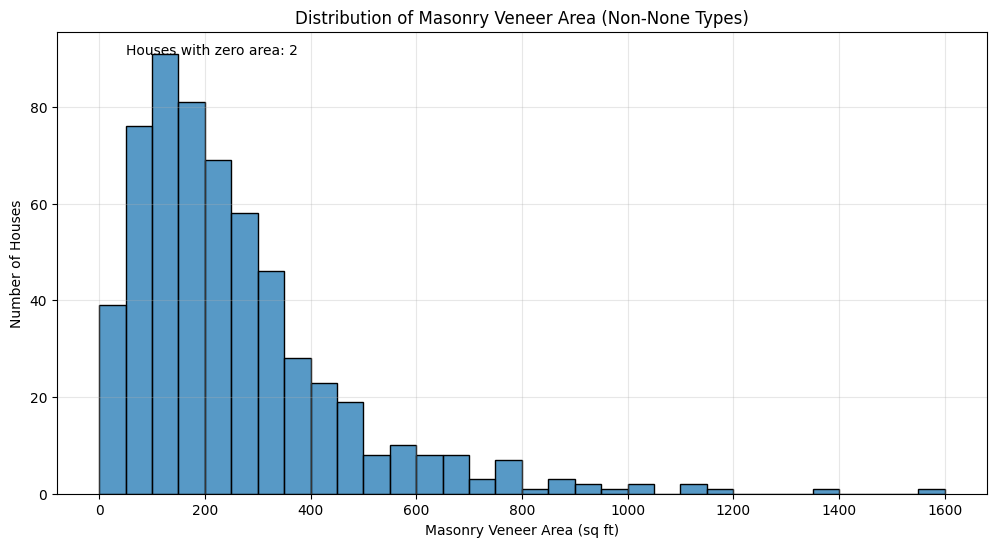

In [13]:
plt.figure(figsize=(12, 6))  # Make plot larger for better readability

# Create histogram with specific improvements
sns.histplot(
    data=train_df[train_df["MasVnrType"].astype(str) != "None"],
    x="MasVnrArea",
    binwidth=50,  # Set specific bin width for better granularity
    stat="count",  # Show actual counts
)

# Add title and labels
plt.title("Distribution of Masonry Veneer Area (Non-None Types)")
plt.xlabel("Masonry Veneer Area (sq ft)")
plt.ylabel("Number of Houses")

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Focus on the zero area by adding a text annotation
zero_count = len(
    train_df[
        (train_df["MasVnrType"].astype(str) != "None") & (train_df["MasVnrArea"] == 0)
    ]
)
plt.text(50, plt.gca().get_ylim()[1] * 0.95, f"Houses with zero area: {zero_count}")

plt.show()

In [14]:
train_df[train_df["MasVnrArea"] < 10]["MasVnrArea"].unique()

array([0., 1.], dtype=float32)

In [15]:
test_df[test_df["MasVnrArea"] < 10]["MasVnrArea"].unique()

array([0., 3., 1.], dtype=float32)

In [16]:
ids = train_df[~train_df["mas_vnr_consistent"]]["Id"].values
train_df_raw[train_df_raw["Id"].isin(ids)].transpose()

,624,688,773,1230,1241,1300,1334
Id,625,689,774,1231,1242,1301,1335
MSSubClass,60,20,20,90,20,60,160
MSZoning,RL,RL,RL,RL,RL,RL,RM
LotFrontage,80.0,60.0,70.0,NaN,83.0,NaN,24.0
LotArea,10400,8089,10150,18890,9849,10762,2368
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,IR1,Reg,IR1,Reg
LandContour,Lvl,HLS,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


In [17]:
train_df = clean_data(train_df)
test_df = clean_data(test_df)
train_df_check = check_data_consistency(train_df)
test_df_check = check_data_consistency(test_df)

In [18]:
# checking masonry veneer data consistency
print(sum(~train_df_check["mas_vnr_consistent"]))
# 7

0


In [19]:
print(sum(~test_df_check["mas_vnr_consistent"]))
# 4

0
